## Grafos e Algoritmos Computacionais
#### [Implementação Grafo Não Direcionado](https://github.com/davidferraz01/Implementacoes-Grafos)

# Implementação:

In [ ]:
import random
import copy

class Vertice:
  def __init__(self, conexoes):
    self.conexoes = conexoes
    self.valido = True

  def grau(self):
    return len(self.conexoes)

class Grafo:
  def __init__(self, vG):
    # Numero de Vertices existentes no Grafo
    self.vG = vG

    # Criando representacao do Grafo atraves da lista de Adjacencia
    self.l_adj = [Vertice([]) for v in range(vG)]


  def get_grau(self, v):
    # Comprimento da lista de vertices ajdacentes a v
    if self.l_adj[v].valido:
      return self.l_adj[v].grau()


  def vizinhos(self, v_1, v_2):
    if self.l_adj[v_1].valido and self.l_adj[v_2].valido:
      # Verifica se v_1 e v_2 sao vizinhos, ou seja, se sao verticies adjacentes e que estao ligados entre si atraves de arestas
      for v in self.l_adj[v_1].conexoes:
        if v == v_2:
          return True
      return False
    else:
      return False


  def imprime_grafo(self):
    for i in range(self.vG):
      if self.l_adj[i].valido:
        print("Vertice_{0} ->".format(i), end="")
        if self.l_adj[i].conexoes == []:
          print()
        else:
          for v in self.l_adj[i].conexoes:
            if v == self.l_adj[i].conexoes[-1]:
              print(" {0}".format(v), end="\n")
            else:
              print(" {0} ->".format(v), end="")
    print()


  def add_aresta(self, v_1, v_2):
    if self.l_adj[v_1].valido and self.l_adj[v_2].valido:
      # Adiciona na lista correspondente ao vertice_1 a conexao (aresta) ao vertice_2
      self.l_adj[v_1].conexoes.append(v_2)

      # Adiciona na lista correspondente ao vertice_2 a conexao (aresta) ao vertice_1
      self.l_adj[v_2].conexoes.append(v_1)
      return True
    else:
      return False


  def del_aresta(self, v_1, v_2):
    try:
      # Remove conexao entre os vertices
      self.l_adj[v_1].conexoes.remove(v_2)
      self.l_adj[v_2].conexoes.remove(v_1)
      return True
    except:
      return False


  def add_vertice(self):
    self.l_adj.append(Vertice([]))
    self.vG += 1
    return True


  def del_vertice(self, v):
    if self.l_adj[v].valido:
      self.l_adj[v].conexoes.clear()
      self.l_adj[v].valido = False

      for i in range(self.vG):
        try:
          self.l_adj[i].conexoes.remove(v)
        except:
          pass
      return True
    else:
      return False


  def busca_profundidade(self, v, visitados):
    visitados[v] = True
    for i in self.l_adj[v].conexoes:
      if visitados[i] == False:
        self.busca_profundidade(i, visitados)


  def conexo(self):
    visitados = [False for i in range(self.vG)]
    v_aleatorio = random.randint(0,self.vG-1)
    self.busca_profundidade(v_aleatorio, visitados)

    for visitado in visitados:
      if visitado == False:
        return False
    return True


  def ciclo_euleriano(self):
    # "Um grafo G e dito ser euleriano se ha um ciclo em G que contenha todas as suas arestas". Ou seja, necessita ser Conexo e todos os seus vertices devem possuir grau par.
    if not self.conexo():
      return False
    else:
      for i in range(self.vG):
        if self.l_adj[i].grau() % 2 != 0:
          return False
      return True


  def _encontrar_ciclo(self, grafo, v, v_inicial, visitados, ciclo):
    # Encontra um ciclo dentro de um grafo conexo que possua ciclo euleriano
    visitados[v] = True
    ciclo.append(v)
    for i in grafo.l_adj[v].conexoes:
      grafo.del_aresta(v,i)
      if i == v_inicial:
        ciclo.append(v_inicial)
        return True

      return self._encontrar_ciclo(grafo, i, v_inicial, visitados, ciclo)


  def _unir_ciclos(self, c_1, c_2):
    # Se um dos ciclos for vazio apenas retorna o nao vazio
    print("Cadeias:", c_1, c_2) # Descomentar caso queira que o algoritmo imprima as cadeias durante o processo de uniao ate a formacao da cadeia euleriana final.
    if c_1 == []:
      c_3 = c_2

    elif c_2 == []:
      c_3 = c_1

    else:
      # uni os ciclos de maneira que o vertice inicial seja igual ao final
      c_3 = []
      i = 0
      while c_1[i] != c_2[0]:
        c_3.append(c_1[i])
        i += 1

      for j in range(len(c_2)):
        c_3.append(c_2[j])

      try:
        for k in range(i+j+1, len(c_1) + len(c_2) - 1):
          c_3.append(c_1[i+1])
          i += 1
      except:
        pass
    return c_3


  def hierholzer(self):
    if self.ciclo_euleriano():
      # Cria uma copia do grafo para realizar o processo
      grafo = Grafo(self.vG)
      grafo.l_adj = copy.deepcopy(self.l_adj)

      def num_conexoes(grafo):
        conexoes = 0
        for v in grafo.l_adj:
          conexoes += v.grau()
        return conexoes

      ciclo = []
      temp_c = []
      # Escolhe um vertice aleatorio para iniciar o processo
      v_aleatorio = random.randint(0,self.vG-1)
      # Iremos encontrar os ciclos no grafo e uni-los para que ao final obtemos o ciclo euleriano
      while num_conexoes(grafo) != 0:
        if ciclo != []:
          v_aleatorio = random.choice(ciclo)
        if grafo.l_adj[v_aleatorio].grau() > 0:
          visitados = [False for i in range(self.vG)]
          self._encontrar_ciclo(grafo, v_aleatorio, v_aleatorio, visitados, temp_c)
          ciclo = self._unir_ciclos(ciclo, temp_c)
          temp_c = []

      return ciclo
    else:
      return []

# Testes:

### Grafo G:

In [ ]:
  # Criando Grafo G
  num_vertices = 9
  g = Grafo(num_vertices)

  # Adicionando Arestas
  g.add_aresta(0,1)
  g.add_aresta(0,2)
  g.add_aresta(1,2)
  g.add_aresta(2,3)
  g.add_aresta(2,4)
  g.add_aresta(3,5)
  g.add_aresta(4,6)
  g.add_aresta(5,7)
  g.add_aresta(6,8)
  g.add_aresta(7,8)

  print("GRAFO G:")
  g.imprime_grafo()

  # Verificando a Existencia de Ciclo Euleriano e imprimindo-o
  print("Grafo possui Ciclo Euleriano:",g.ciclo_euleriano(), end="\n\n")
  print("Ciclo Euleriano:",g.hierholzer(), end="\n\n")

  # Adicionando Vertices
  g.add_vertice()
  g.add_vertice()
  print("Apos adicao dos vertices: {0} {1}".format(g.vG - 2, g.vG - 1))
  g.imprime_grafo()

  # Adicionando Aresta nos novos vertices
  print("Apos adicao da aresta: {0} -> {1}".format(9,10))
  g.add_aresta(9,10)
  g.imprime_grafo()

  # Removendo Aresta
  g.del_aresta(3, 5)
  print("Apos remocao da aresta: {0} -> {1}".format(3,5))
  g.imprime_grafo()

  # Removendo Vertice
  g.del_vertice(0)
  print("Apos remocao da vertice: {0}".format(0))
  g.imprime_grafo()

  # Imprimindo Grau de um Vertice
  print("Grau do vertice {0}: {1}".format(0,g.get_grau(0)))
  print("Grau do vertice {0}: {1}".format(1,g.get_grau(1)))

  print()

  # Verificando se dois Vertices sao vizinhos
  print("{0} e {1} sao vizinhos: {2}".format(1,0,g.vizinhos(1,0)))
  print("{0} e {1} sao vizinhos: {2}".format(2,3,g.vizinhos(2,3)))

GRAFO G:
Vertice_0 -> 1 -> 2
Vertice_1 -> 0 -> 2
Vertice_2 -> 0 -> 1 -> 3 -> 4
Vertice_3 -> 2 -> 5
Vertice_4 -> 2 -> 6
Vertice_5 -> 3 -> 7
Vertice_6 -> 4 -> 8
Vertice_7 -> 5 -> 8
Vertice_8 -> 6 -> 7

Grafo possui Ciclo Euleriano: True

Cadeias: [] [2, 0, 1, 2]
Cadeias: [2, 0, 1, 2] [2, 3, 5, 7, 8, 6, 4, 2]
Ciclo Euleriano: [2, 3, 5, 7, 8, 6, 4, 2, 0, 1, 2]

Apos adicao dos vertices: 9 10
Vertice_0 -> 1 -> 2
Vertice_1 -> 0 -> 2
Vertice_2 -> 0 -> 1 -> 3 -> 4
Vertice_3 -> 2 -> 5
Vertice_4 -> 2 -> 6
Vertice_5 -> 3 -> 7
Vertice_6 -> 4 -> 8
Vertice_7 -> 5 -> 8
Vertice_8 -> 6 -> 7
Vertice_9 ->
Vertice_10 ->

Apos adicao da aresta: 9 -> 10
Vertice_0 -> 1 -> 2
Vertice_1 -> 0 -> 2
Vertice_2 -> 0 -> 1 -> 3 -> 4
Vertice_3 -> 2 -> 5
Vertice_4 -> 2 -> 6
Vertice_5 -> 3 -> 7
Vertice_6 -> 4 -> 8
Vertice_7 -> 5 -> 8
Vertice_8 -> 6 -> 7
Vertice_9 -> 10
Vertice_10 -> 9

Apos remocao da aresta: 3 -> 5
Vertice_0 -> 1 -> 2
Vertice_1 -> 0 -> 2
Vertice_2 -> 0 -> 1 -> 3 -> 4
Vertice_3 -> 2
Vertice_4 -> 2 -> 6
V

Grafo G:


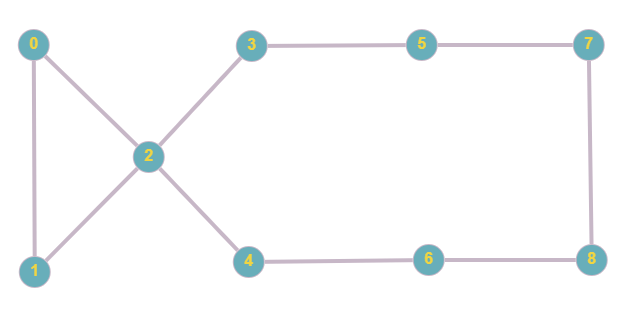

Uma possível saída do Algoritmo de Hierholzer:

Cadeias: [2, 0, 1, 2] e [2, 3, 5, 7, 8, 6, 4, 2]

Ciclo Euleriano: [2, 3, 5, 7, 8, 6, 4, 2, 0, 1, 2]

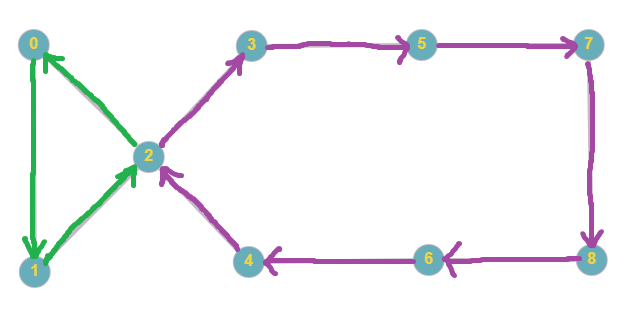


**Obs:** Diferentes cadeias podem ser geradas pois o vértice escolhido para iniciar o processo é aleatório.

### Grafo H:

In [ ]:
# Criando Grafo H
num_vertices = 8
h = Grafo(num_vertices)

# Adicionando Arestas
h.add_aresta(0,1)
h.add_aresta(0,2)
h.add_aresta(1,2)
h.add_aresta(2,3)
h.add_aresta(2,4)
h.add_aresta(3,4)
h.add_aresta(3,5)
h.add_aresta(3,6)
h.add_aresta(4,6)
h.add_aresta(4,7)
h.add_aresta(5,6)
h.add_aresta(6,7)

print("GRAFO H:")
h.imprime_grafo()

# Verificando a Existencia de Ciclo Euleriano e imprimindo-o
print("Grafo possui Ciclo Euleriano:",h.ciclo_euleriano(), end="\n\n")
print("Ciclo Euleriano:",h.hierholzer(), end="\n\n")

# Adicionando Vertices
h.add_vertice()
h.add_vertice()
print("Apos adicao dos vertices: {0} {1}".format(h.vG - 2, h.vG - 1))
h.imprime_grafo()

# Adicionando Aresta nos novos vertices
print("Apos adicao da aresta: {0} -> {1}".format(8,9))
h.add_aresta(8,9)
h.imprime_grafo()

# Removendo Aresta
h.del_aresta(2, 4)
print("Apos remocao da aresta: {0} -> {1}".format(2,4))
h.imprime_grafo()

# Removendo Vertice
h.del_vertice(6)
print("Apos remocao da vertice: {0}".format(6))
h.imprime_grafo()

# Imprimindo Grau de um Vertice
print("Grau do vertice {0}: {1}".format(2,h.get_grau(2)))
print("Grau do vertice {0}: {1}".format(3,h.get_grau(3)))

print()

# Verificando se dois Vertices sao vizinhos
print("{0} e {1} sao vizinhos: {2}".format(5,6,h.vizinhos(5,6)))
print("{0} e {1} sao vizinhos: {2}".format(0,4,h.vizinhos(0,4)))

GRAFO H:
Vertice_0 -> 1 -> 2
Vertice_1 -> 0 -> 2
Vertice_2 -> 0 -> 1 -> 3 -> 4
Vertice_3 -> 2 -> 4 -> 5 -> 6
Vertice_4 -> 2 -> 3 -> 6 -> 7
Vertice_5 -> 3 -> 6
Vertice_6 -> 3 -> 4 -> 5 -> 7
Vertice_7 -> 4 -> 6

Grafo possui Ciclo Euleriano: True

Cadeias: [] [2, 0, 1, 2]
Cadeias: [2, 0, 1, 2] [2, 3, 4, 2]
Cadeias: [2, 3, 4, 2, 0, 1, 2] [4, 6, 3, 5, 6, 7, 4]
Ciclo Euleriano: [2, 3, 4, 6, 3, 5, 6, 7, 4, 2, 0, 1, 2]

Apos adicao dos vertices: 8 9
Vertice_0 -> 1 -> 2
Vertice_1 -> 0 -> 2
Vertice_2 -> 0 -> 1 -> 3 -> 4
Vertice_3 -> 2 -> 4 -> 5 -> 6
Vertice_4 -> 2 -> 3 -> 6 -> 7
Vertice_5 -> 3 -> 6
Vertice_6 -> 3 -> 4 -> 5 -> 7
Vertice_7 -> 4 -> 6
Vertice_8 ->
Vertice_9 ->

Apos adicao da aresta: 8 -> 9
Vertice_0 -> 1 -> 2
Vertice_1 -> 0 -> 2
Vertice_2 -> 0 -> 1 -> 3 -> 4
Vertice_3 -> 2 -> 4 -> 5 -> 6
Vertice_4 -> 2 -> 3 -> 6 -> 7
Vertice_5 -> 3 -> 6
Vertice_6 -> 3 -> 4 -> 5 -> 7
Vertice_7 -> 4 -> 6
Vertice_8 -> 9
Vertice_9 -> 8

Apos remocao da aresta: 2 -> 4
Vertice_0 -> 1 -> 2
Vertice_1 -> 0

Grafo H:

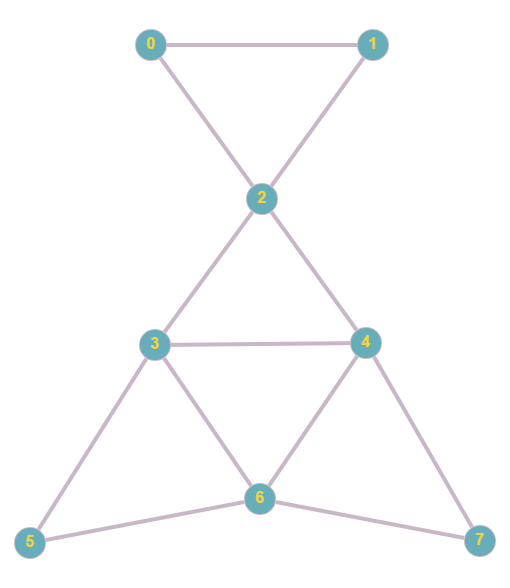

Uma possível saída do Algoritmo de Hierholzer:

Cadeias: [2, 3, 4, 2, 0, 1, 2] e [4, 6, 3, 5, 6, 7, 4]

Ciclo Euleriano: [2, 3, 4, 6, 3, 5, 6, 7, 4, 2, 0, 1, 2]

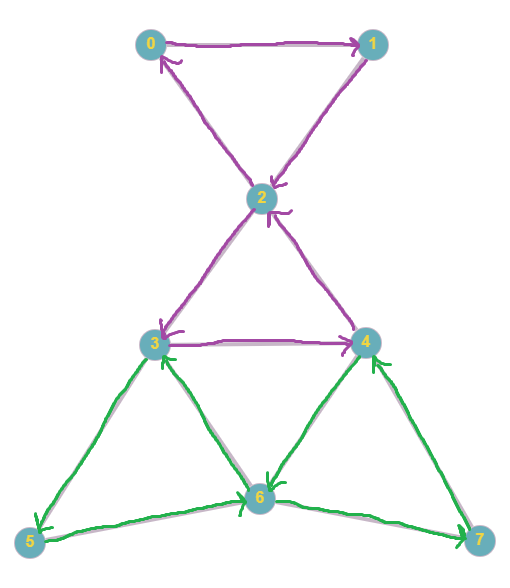


**Obs:** Diferentes cadeias podem ser geradas pois o vértice escolhido para iniciar o processo é aleatório.

Grafo K:

In [ ]:
# Criando Grafo K
num_vertices = 8
k = Grafo(num_vertices)

# Adicionando Arestas
k.add_aresta(0,1)
k.add_aresta(0,2)
k.add_aresta(1,2)
k.add_aresta(1,3)
k.add_aresta(1,5)
k.add_aresta(2,6)
k.add_aresta(2,4)
k.add_aresta(3,5)
k.add_aresta(4,6)
k.add_aresta(5,6)
k.add_aresta(5,7)
k.add_aresta(6,7)

print("GRAFO K:")
k.imprime_grafo()

# Verificando a Existencia de Ciclo Euleriano e imprimindo-o
print("Grafo possui Ciclo Euleriano:",k.ciclo_euleriano(), end="\n\n")
print("Ciclo Euleriano:",k.hierholzer(), end="\n\n")

# Adicionando Vertices
k.add_vertice()
k.add_vertice()
print("Apos adicao dos vertices: {0} {1}".format(k.vG - 2, k.vG - 1))
k.imprime_grafo()

# Adicionando Aresta nos novos vertices
print("Apos adicao da aresta: {0} -> {1}".format(8,9))
k.add_aresta(8,9)
k.imprime_grafo()

# Removendo Aresta
k.del_aresta(7, 5)
print("Apos remocao da aresta: {0} -> {1}".format(7,5))
k.imprime_grafo()

# Removendo Vertice
k.del_vertice(5)
print("Apos remocao da vertice: {0}".format(5))
k.imprime_grafo()

# Imprimindo Grau de um Vertice
print("Grau do vertice {0}: {1}".format(4,k.get_grau(4)))
print("Grau do vertice {0}: {1}".format(6,k.get_grau(6)))

print()

# Verificando se dois Vertices sao vizinhos
print("{0} e {1} sao vizinhos: {2}".format(0,7,k.vizinhos(0,7)))
print("{0} e {1} sao vizinhos: {2}".format(2,6,k.vizinhos(2,6)))

GRAFO K:
Vertice_0 -> 1 -> 2
Vertice_1 -> 0 -> 2 -> 3 -> 5
Vertice_2 -> 0 -> 1 -> 6 -> 4
Vertice_3 -> 1 -> 5
Vertice_4 -> 2 -> 6
Vertice_5 -> 1 -> 3 -> 6 -> 7
Vertice_6 -> 2 -> 4 -> 5 -> 7
Vertice_7 -> 5 -> 6

Grafo possui Ciclo Euleriano: True

Cadeias: [] [4, 2, 0, 1, 2, 6, 4]
Cadeias: [4, 2, 0, 1, 2, 6, 4] [6, 5, 1, 3, 5, 7, 6]
Ciclo Euleriano: [4, 2, 0, 1, 2, 6, 5, 1, 3, 5, 7, 6, 4]

Apos adicao dos vertices: 8 9
Vertice_0 -> 1 -> 2
Vertice_1 -> 0 -> 2 -> 3 -> 5
Vertice_2 -> 0 -> 1 -> 6 -> 4
Vertice_3 -> 1 -> 5
Vertice_4 -> 2 -> 6
Vertice_5 -> 1 -> 3 -> 6 -> 7
Vertice_6 -> 2 -> 4 -> 5 -> 7
Vertice_7 -> 5 -> 6
Vertice_8 ->
Vertice_9 ->

Apos adicao da aresta: 8 -> 9
Vertice_0 -> 1 -> 2
Vertice_1 -> 0 -> 2 -> 3 -> 5
Vertice_2 -> 0 -> 1 -> 6 -> 4
Vertice_3 -> 1 -> 5
Vertice_4 -> 2 -> 6
Vertice_5 -> 1 -> 3 -> 6 -> 7
Vertice_6 -> 2 -> 4 -> 5 -> 7
Vertice_7 -> 5 -> 6
Vertice_8 -> 9
Vertice_9 -> 8

Apos remocao da aresta: 7 -> 5
Vertice_0 -> 1 -> 2
Vertice_1 -> 0 -> 2 -> 3 -> 5
Vertice_2 

Grafo K:


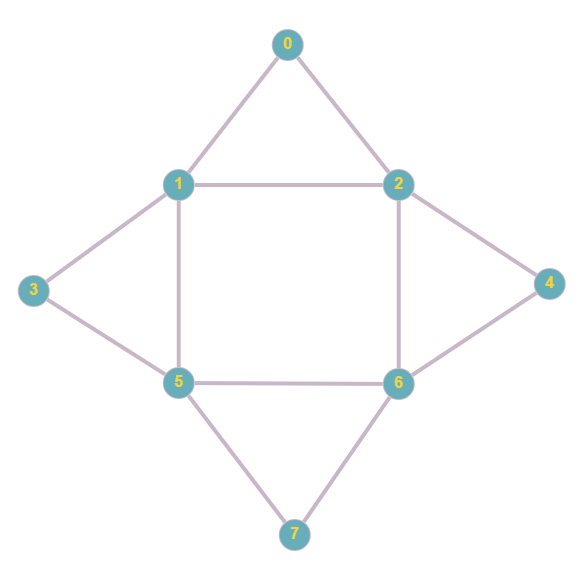

Uma possível saída do Algoritmo de Hierholzer:

Cadeias: [4, 2, 0, 1, 2, 6, 4] e [6, 5, 1, 3, 5, 7, 6]

Ciclo Euleriano: [4, 2, 0, 1, 2, 6, 5, 1, 3, 5, 7, 6, 4]

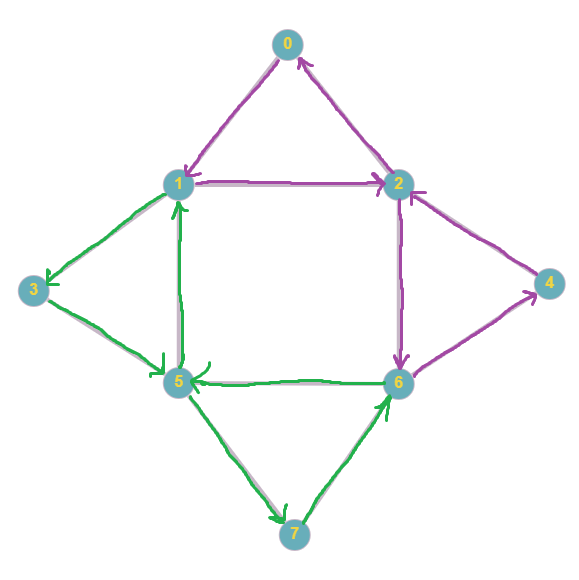


**Obs:** Diferentes cadeias podem ser geradas pois o vértice escolhido para iniciar o processo é aleatório.